BUILDING LINEAR REGRESSION


In [ ]:
import numpy as np

In [ ]:
class Linear_Regression:

  def __init__(self,learningRate,no_of_iterations):
        self.learningRate=learningRate
        self.no_of_iterations=no_of_iterations

  def fit(self,X,Y):
        #no_of_features and no_of_training_examples
        self.m,self.n=X.shape
        #initiating weight and bias
        self.w=np.zeros(self.n)
        self.b=0
        self.X=X
        self.Y=Y

        #implementing gradient descent
        for i in range(self.no_of_iterations):
          self.update_weights()
 
  def update_weights( self ) :
             
        Y_prediction = self.predict( self.X )
          
        # calculate gradients  
      
        dw = - ( 2 * ( self.X.T ).dot( self.Y - Y_prediction )  ) / self.m
       
        db = - 2 * np.sum( self.Y - Y_prediction ) / self.m 
          
        # updating the weights
      
        self.w = self.w - self.learningRate * dw
      
        self.b = self.b - self.learningRate * db

  def predict(self,X):
        return X.dot(self.w)+self.b

Using linear regression for model prediction


In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import matplotlib.pyplot as plt

Data preprocessing

In [ ]:
#loading data
salary=pd.read_csv("/content/salary_data.csv")
salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
salary.shape

(30, 2)

In [ ]:
#removing rows that have missing values
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
#splitting feature and target column

In [ ]:
x=salary.iloc[:,:-1].values
y=salary.iloc[:,-1].values


[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [ ]:
#splitting the dataset into training and test
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.33,random_state=2)

Training linear regression model

In [ ]:
model=Linear_Regression(0.02,1000)
model.fit(X_train,Y_train)

In [ ]:
#printing paarameter values
model.w

array([9512.94498763])

In [ ]:
model.b

23707.81324657524

In [ ]:
test_data_prediction=model.predict(X_test)

In [ ]:
print(test_data_prediction)

[ 36074.64173049  34172.05273297  66516.0656909   58905.7097008
  91249.72265873  80785.48317234 101713.96214512  52246.64820946
  42733.70322183  88395.83916244]


Visualising test values and actual values

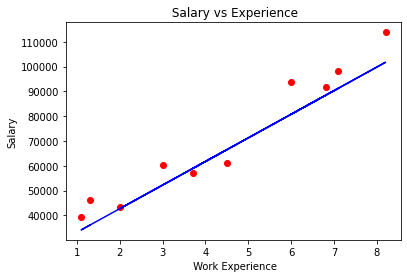

In [ ]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel(' Work Experience')
plt.ylabel('Salary')
plt.title(' Salary vs Experience')
plt.show()